In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [ ]:
df = pd.read_csv("PJME_hourly.csv")

In [ ]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

<Axes: xlabel='Datetime'>

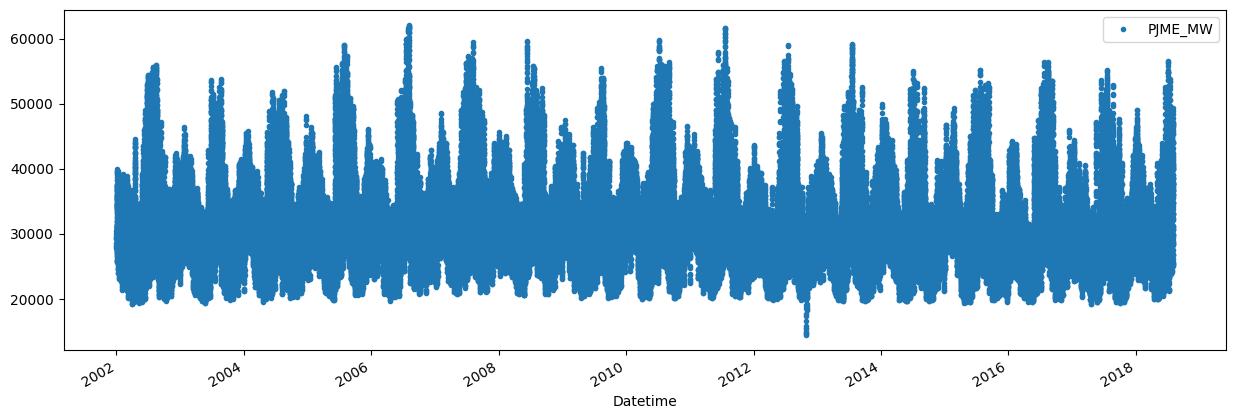

In [ ]:
df.plot(style = '.', figsize = (15,5))

TRAIN/TEST SPLIT


<Axes: xlabel='Datetime'>

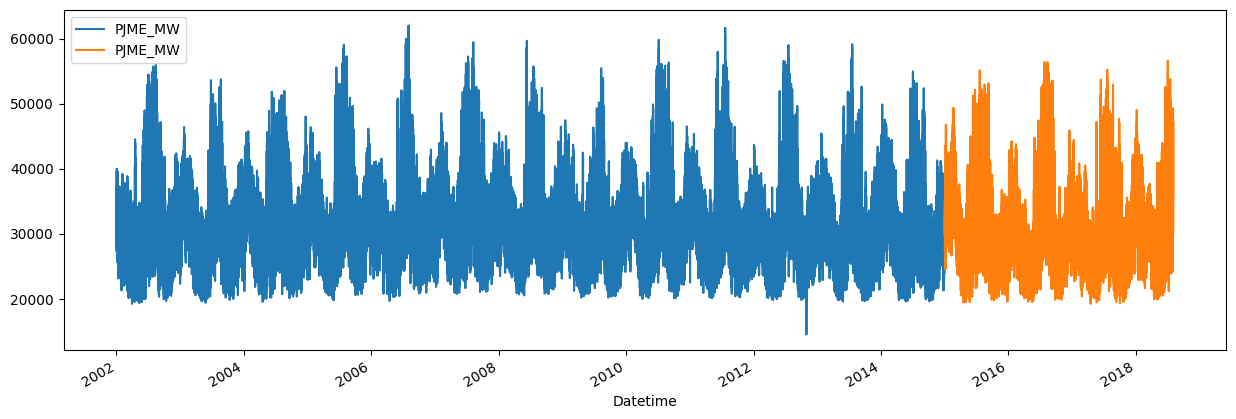

In [ ]:
train = df.loc[df.index < "01-01-2015"]
test = df.loc[df.index >= "01-01-2015"]

fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax, label = 'Train Set')
test.plot(ax = ax, label = "Test Set")

<Axes: xlabel='Datetime'>

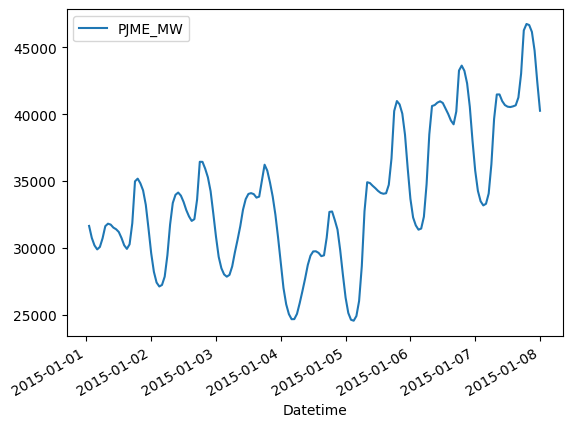

In [ ]:
df.loc[(df.index > "01-01-2015") & (df.index <= "01-08-2015")].plot()

In [ ]:
def create_features(df):

  df = df.copy()
  df["hour"] = df.index.hour
  df["dayofweek"] = df.index.dayofweek
  df['year'] = df.index.year
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['weekofyear'] = df.index.weekofyear

  return df

In [ ]:
train = create_features(train)
test = create_features(test)

<ipython-input-8-a435e38b2800>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear
<ipython-input-8-a435e38b2800>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


In [ ]:
test.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'year', 'quarter', 'month',
       'weekofyear'],
      dtype='object')

In [ ]:
features = ['hour', 'dayofweek', 'year', 'quarter', 'month','weekofyear']

target = ['PJME_MW']

In [ ]:
x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [ ]:
model = xgb.XGBRegressor(n_estimators = 1000, booster = 'gbtree', early_stopping_rounds = 50, learning_rate = 0.01)

In [ ]:
model.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test,y_test)],verbose = 100)

[0]	validation_0-rmse:6407.64412	validation_1-rmse:6480.06934
[100]	validation_0-rmse:3946.29588	validation_1-rmse:4316.38618
[200]	validation_0-rmse:3286.51382	validation_1-rmse:3869.05378
[300]	validation_0-rmse:3042.04549	validation_1-rmse:3739.16088
[400]	validation_0-rmse:2894.62674	validation_1-rmse:3730.09483
[421]	validation_0-rmse:2865.77049	validation_1-rmse:3733.48795


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

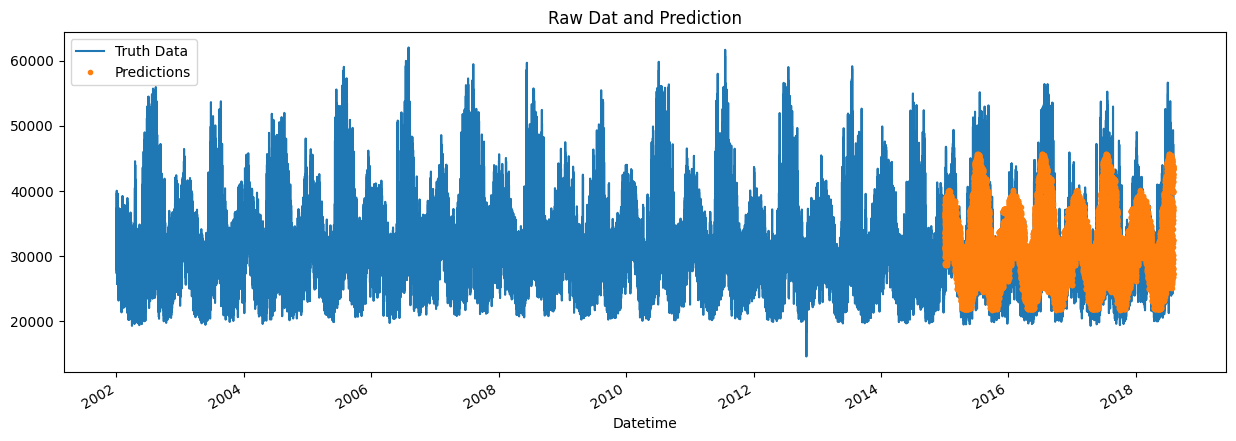

In [ ]:
test['prediction'] = model.predict(x_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

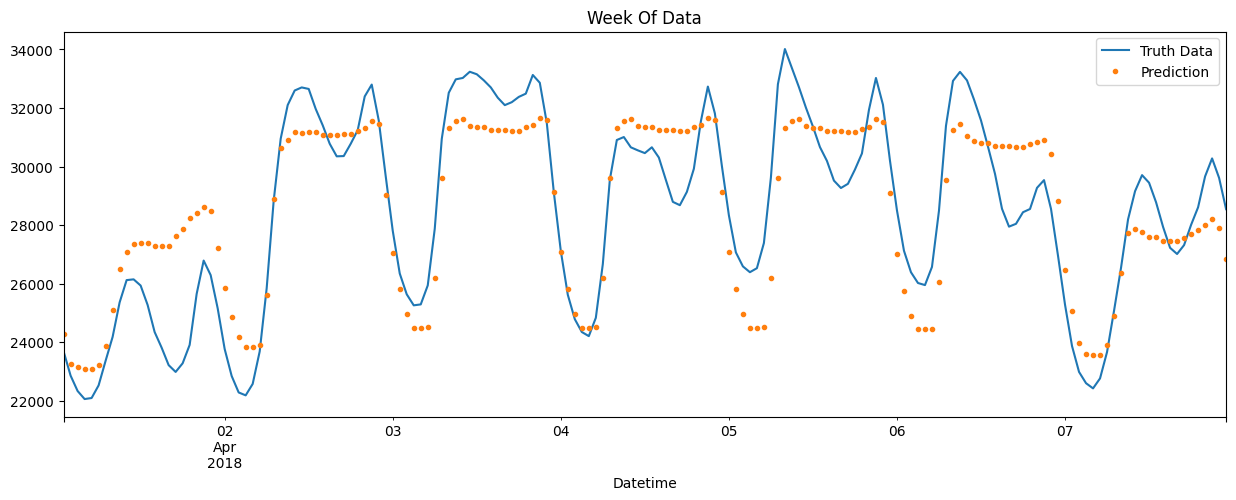

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()